<h1 align="center">Using Optimizers from PyTorch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

A `otimização` é um processo em que tentamos encontrar o melhor conjunto possível de parâmetros para um modelo de aprendizado profundo. Os otimizadores geram novos valores de parâmetros e os avaliam usando algum critério para determinar a melhor opção. Sendo uma parte importante da arquitetura da rede neural, `os otimizadores ajudam a determinar os melhores pesos`, `vieses` ou `outros hiperparâmetros` que resultarão na saída desejada.

Existem muitos tipos de otimizadores disponíveis no `PyTorch`, cada um com seus próprios pontos fortes e fracos. Estes incluem `Adagrad`, `Adam`, `RMSProp` e assim por diante.

Nos scripts anteriores, implementamos todas as etapas necessárias de um otimizador para atualizar os `pesos` e `vieses` durante o treinamento. Aqui, você conhecerá alguns pacotes `PyTorch` que tornam a implementação dos otimizadores ainda mais fácil.

# Preparing Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

Usaremos uma classe de dados personalizada. Os dados são uma linha com valores de $-5$ a $5$ tendo `inclinação` e `viés` de $-5$ e $1$ respectivamente. Além disso, adicionaremos o ruído com os mesmos valores $x$ e treinaremos nosso modelo para estimar essa linha.

In [2]:
# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

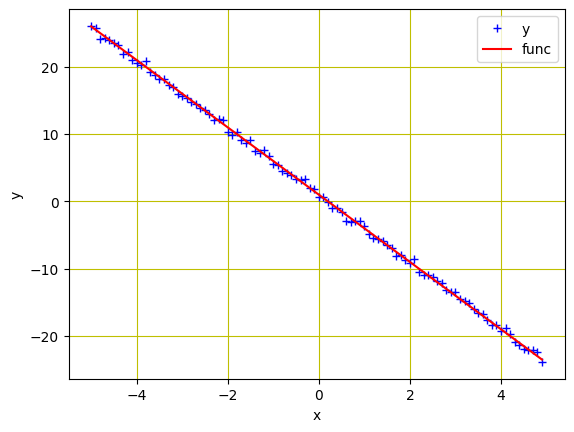

In [3]:
# Create dataset object
data_set = Build_Data()
 
# Plot and visualizing the data points
plt.plot(data_set.x.numpy(), data_set.y.numpy(), 'b+', label = 'y')
plt.plot(data_set.x.numpy(), data_set.func.numpy(), 'r', label = 'func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

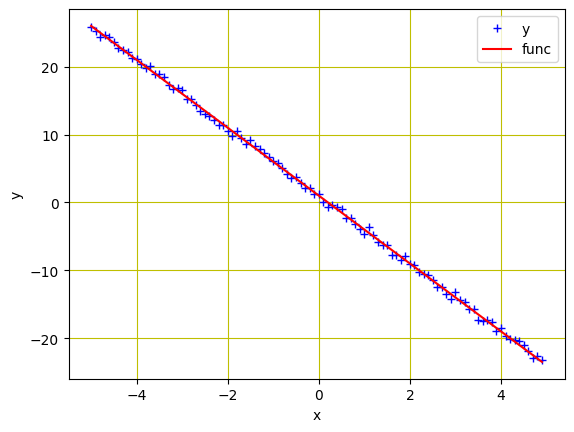

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
 
# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len
 
# Create dataset object
data_set = Build_Data()
 
# Plot and visualizing the data points
plt.plot(data_set.x.numpy(), data_set.y.numpy(), 'b+', label = 'y')
plt.plot(data_set.x.numpy(), data_set.func.numpy(), 'r', label = 'func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

# Construindo o Modelo e a função Loss

In [5]:
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

Os parâmetros do modelo são randomizados na criação. Podemos verificar isso com o seguinte:

In [6]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1788]], requires_grad=True), Parameter containing:
tensor([-0.1148], requires_grad=True)]


Embora o `PyTorch` inicialize aleatoriamente os parâmetros do modelo, também podemos personalizá-los para usar os nossos. Podemos definir nossos `pesos` e `bias` da seguinte maneira. Observe que raramente precisamos fazer isso na prática.

In [7]:
model.state_dict()['weight'][0] = -10
model.state_dict()['bias'][0] = -20

In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-10.]], requires_grad=True), Parameter containing:
tensor([-20.], requires_grad=True)]


Antes de iniciarmos o treinamento, vamos criar um objeto `DataLoader` para carregar nosso conjunto de dados no pipeline.

In [9]:
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

In [10]:
trainloader

# Treinar um modelo com `Stochastic Gradient Descent`

Para usar o otimizador de nossa escolha, podemos importar o pacote `optim` do `PyTorch`. Ele inclui vários algoritmos de otimização de parâmetros de última geração que podem ser implementados com apenas uma única linha de código. **Por exemplo**, Stochastic Gradient Descent (SGD) está disponível como segue.

In [11]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Como entrada, fornecemos ao `model.parameters()` construtor para denotar o que otimizar. Também definimos o `tamanho do passo` ou `taxa de aprendizado` (`lr`).

Para ajudar a visualizar o progresso do otimizador posteriormente, criamos uma lista vazia para armazenar a Loss e deixamos nosso modelo treinar por $20$ épocas.

In [12]:
loss_SGD = []
n_iter = 20
 
for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

Acima, alimentamos as amostras de dados no modelo para previsão e calculamos a Loss. Os gradientes são calculados durante a `passagem para trás` (`backward pass`) e os parâmetros são otimizados. Enquanto nas sessões anteriores usamos algumas linhas extras de código para atualizar os parâmetros e `zerar os gradientes`, `zero_grad()` e `step()` métodos do PyTorch do otimizador tornam o processo conciso.

Você pode aumentar o argumento `batch_size` no objeto `DataLoader` acima para descida de gradiente de `mini-batch`.

Juntos, o código completo é o seguinte:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
 
# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len
 
# Create dataset object
data_set = Build_Data()
 
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
 
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)
 
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
loss_SGD = []
n_iter = 20
 
for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

# Treinar um Modelo com `Adam Optimizer`

`Adam` é um dos otimizadores mais usados ​​para treinar modelos de aprendizado profundo. É rápido e bastante eficiente quando você tem muitos dados para treinamento. `Adam` é um otimizador com `momentum` que pode ter um desempenho melhor que o `SGD` quando o modelo é complexo, como na maioria dos casos de aprendizado profundo.

No `PyTorch`, substituir o otimizador `SGD` acima pelo otimizador `Adam` é o seguinte. Embora todas as outras etapas sejam as mesmas, precisamos apenas substituir o método `SGD()` por `Adam()` para implementar o algoritmo.

In [14]:
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Da mesma forma, definiremos o número de iterações e uma lista vazia para armazenar a perda do modelo. Então podemos executar nosso treinamento.

In [15]:
loss_Adam = []
n_iter = 20
 
for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
 
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len
 
# Create dataset object
data_set = Build_Data()
 
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
 
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)
 
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 
loss_Adam = []
n_iter = 20
 
for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

# Gráficos de plotagem

Implementamos com sucesso os otimizadores `SGD` e `Adam` para treinamento do modelo. Vamos visualizar como a Loss do modelo diminui em ambos os algoritmos durante o processo de treinamento, que são armazenados nas listas `loss_SGD` e `loss_Adam`:

Você pode ver que `SGD` converge mais rápido que `Adam` nos exemplos acima. Isso ocorre porque estamos treinando um modelo de `regressão linear`, no qual o algoritmo fornecido por Adam é exagerado.

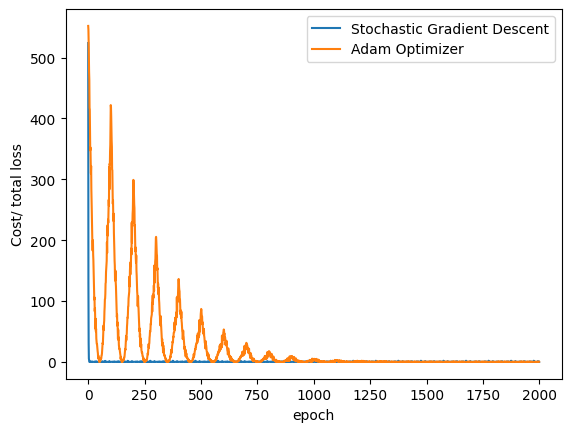

In [17]:
plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

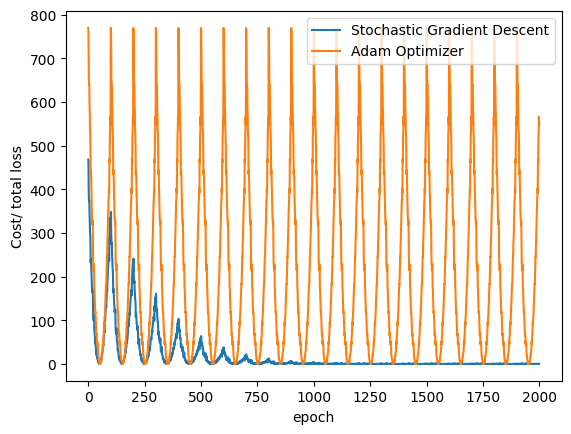

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
 
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len
 
# Create dataset object
data_set = Build_Data()
 
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
 
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)
 
# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
 
loss_SGD = []
n_iter = 20
 
for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()
 
model = torch.nn.Linear(1, 1)
loss_Adam = []
for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()
 
plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()